### Importing Requirements

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Importing Models

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Importing Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/samyvivo/Cross_Val-vs-Train_Test_Split/refs/heads/main/heart%20disease.csv")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [61]:
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [63]:
X = df.drop("target", axis=1)
y = df["target"]

### Label Distribution

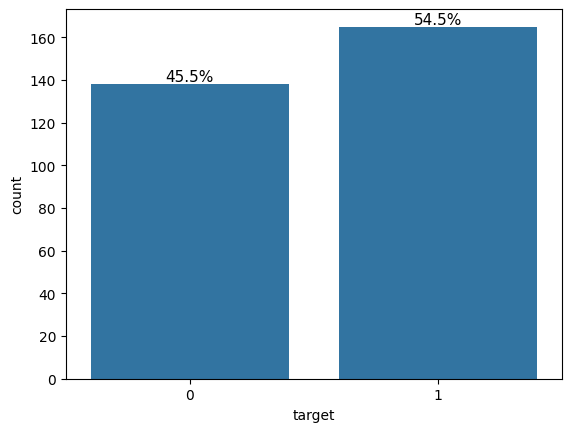

In [65]:
ax = sns.countplot(df, x = "target")

total = len(df)
for i in ax.patches:
    count = i.get_height()
    percentage = f'{100 * count / total:.1f}%'
    a = i.get_x() + i.get_width() / 2
    b = i.get_height()
    ax.annotate(percentage, (a, b), ha='center', va='bottom', fontsize=11)

plt.show()

# Train Test Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=43)

In [88]:
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), SVC(), RandomForestClassifier(), XGBClassifier()]

results=[]
for model in models:

    model.fit(X_train, y_train)
    model_predict = model.predict(X_test)
    model_accuracy = accuracy_score(model_predict, y_test)
    results.append([model.__class__.__name__, f"{model_accuracy:.2f}"])

results.sort(key=lambda x: x[1], reverse=True)
print("    🏆 Model Evaluation Complete 🏆", "\n")
print(tabulate(results, headers=["Model", "Accuracy"], tablefmt="fancy_grid"))


    🏆 Model Evaluation Complete 🏆 

╒════════════════════════╤════════════╕
│ Model                  │   Accuracy │
╞════════════════════════╪════════════╡
│ XGBClassifier          │       0.84 │
├────────────────────────┼────────────┤
│ LogisticRegression     │       0.82 │
├────────────────────────┼────────────┤
│ RandomForestClassifier │       0.82 │
├────────────────────────┼────────────┤
│ KNeighborsClassifier   │       0.7  │
├────────────────────────┼────────────┤
│ SVC                    │       0.69 │
╘════════════════════════╧════════════╛


In [94]:
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), SVC(kernel="linear"), RandomForestClassifier(), XGBClassifier()]

results=[]
for model in models:
    cross_val = cross_val_score(model, X, y, cv=5)
    mean_cross_val = np.mean(cross_val)
    results.append([model.__class__.__name__, f"{mean_cross_val:.2f}"])

results.sort(key=lambda x: x[1], reverse=True)
print("    🏆 Model Evaluation Complete 🏆", "\n")
print(tabulate(results, headers=["Model", "Accuracy"], tablefmt="fancy_grid"))

c:\Users\samyh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    🏆 Model Evaluation Complete 🏆 

╒════════════════════════╤════════════╕
│ Model                  │   Accuracy │
╞════════════════════════╪════════════╡
│ RandomForestClassifier │       0.84 │
├────────────────────────┼────────────┤
│ LogisticRegression     │       0.83 │
├────────────────────────┼────────────┤
│ SVC                    │       0.83 │
├────────────────────────┼────────────┤
│ XGBClassifier          │       0.79 │
├────────────────────────┼────────────┤
│ KNeighborsClassifier   │       0.64 │
╘════════════════════════╧════════════╛
